# Materialien zu <i>zufall</i>

Autor: Holger Böttcher - hbomat@posteo.de

## Aufgaben 3 - Urnen-Experimente (2)

<br>
<i>Die Aufgaben wurden entnommen aus 

A. Müller<br>
Wahrscheinlichkeitsrechnung und Statistik<br>
Grundkurs<br>
Stark Verlag 1997<br>

Aufgaben 19, 20, 22
<br>

### Aufgabe 19
Ein Elektronikbastler steht ratlos vor einer Schachtel mit zwölf gleich aussehen-<br>
den Kondensatoren, von denen er nur weiß, dass zehn in Ordnung (1) und zwei <br>
defekt (0) sind. Er entnimmt zwei Kondensatoren ohne Zurücklegen.
<br>
<br>
a) Zeichnen Sie zu diesem Zufallsexperiment ein Baumdiagramm, bestimmen Sie<br>
&nbsp;&nbsp;&nbsp;&nbsp;den zugehörigen Ereignisraum $\Omega\,$ und geben Sie an, wie viele Elemente der<br>
&nbsp;&nbsp;&nbsp;&nbsp;zugehörige Ereigniraum $P(\Omega)\,$ besitzt
<br>
<br>
b) Bestimmen Sie dann die Wahrscheinlichkeiten der Elementarereignisse sowie<br>
&nbsp;&nbsp;&nbsp;&nbsp;der Ereignisse
<br>
<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$A$ = "Höchstens ein Kondensator ist defekt" <br>
 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$B$ = "Genau ein Kondensator ist defekt"
<br>
<br>
c) Formulieren Sie das Ereignis $C = \overline{A} \cup \overline{B}\,$ in Worten und bestimmen Sie die<br>
&nbsp;&nbsp;&nbsp;&nbsp;Wahrscheinlichkeit $P(C)$
<br>
<br>
d) Es werden vier Kondensatoren ohne Zurücklegen entnommen. Mit welcher<br>
&nbsp;&nbsp;&nbsp;&nbsp;Wahrscheinlichkeit sind der erste und der vierte Kondensator die beiden defek-<br>
&nbsp;&nbsp;&nbsp;&nbsp;ten?
<br><br>

In [1]:
%run zufall/start

<br>
Das zugrunde liegende Urne-Modell ist

In [10]:
u = Urne( { 1:10, 0:2 }, 2, w=ohne )
u

Urne(Stufen=2, ohne Wiederholung , mit Anordnung)

### zu a)

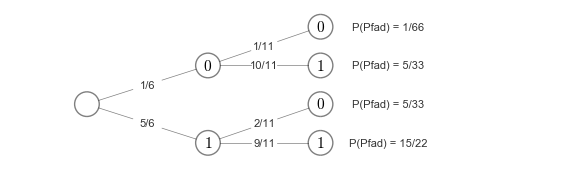

In [3]:
u.baum

$\Omega$, Anzahl der Elemente und Größe der Potenzmenge $P(\Omega)$:

In [4]:
u.omega, u.n_omega, 2^4

(set([00, 01, 10, 11]), 4, 16)

### zu b)

In [5]:
u.vert   # Wahrscheinlichkeitsverteilung

⎧                                  15⎫
⎨00: 1/66, 01: 5/33, 10: 5/33, 11: ──⎬
⎩                                  22⎭

In [6]:
A = { *symbols('11, 10, 01') }   # hier müssen Symbole angegeben werden
                                 # * packt das Tupel aus
u.P(A), u.P(A, d=4)

⎛65        ⎞
⎜──, 0.9848⎟
⎝66        ⎠

In [7]:
B = { *symbols('10, 01') }  

u.P(B), u.P(B, d=4)

⎛10       ⎞
⎜──, 0.303⎟
⎝33       ⎠

### zu c)

In [8]:
ea = EA(u.omega)
C = ea.berechnen(A, B, 'mindestens A oder B')
C

set([01, 10, 11])

Ergebnis ist "Beide sind in Ordnung oder beide sind defekt"

In [9]:
u.P(C), u.P(C, d=4)

⎛65        ⎞
⎜──, 0.9848⎟
⎝66        ⎠

### zu d)

In [11]:
u1 = Urne( { 1:10, 0:2 }, 4, w=ohne ); u1

Urne(Stufen=4, ohne Wiederholung , mit Anordnung)

In [12]:
D = Symbol('0110'); u1.P(D), u1.P(D, d=4)

(1/66, 0.0152)

### Aufgabe 20
In einem nicht einsehbaren Behältnis befinden sich zehn Schrauben, acht schwar-<br>
ze ($s$) und zwei goldfarbene ($g$). Die Schrauben unterscheiden sich nur in der Farbe. <br>
Ein Hobbybastler entnimmt dreimal hintereinander eine Schraube und legt sie auf <br>
seine Werkbank.
<br>
<br>
a) Fertigen Sie ein Baumdiagramm und berechnen Sie die Wahrscheinlichkeit der<br>
&nbsp;&nbsp;&nbsp;&nbsp;Ereignisse
<br>
<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$A$ = "Höchstens eine goldene Schraube ist dabei" <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$B$ = "Die zweite Schraube ist goldfarben" <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$C$ = "Die erste oder die dritte Schraube ist goldfarben" 
<br><br>
b)  Formulieren Sie $\,\overline{C}\,$ in Worten und überprüfen Sie die Ereignisse $B$ und $\overline{C}\,$  auf Un-<br>
&nbsp;&nbsp;&nbsp;&nbsp;vereinbarkeit
<br>
<br>
c)  Mit welcher Wahrscheinlichkeit erhält man bei sechsmaligem Ziehen ohne Zurück-<br>
&nbsp;&nbsp;&nbsp;&nbsp;legen das Ereignis {ssgsgs}? 
<br>

Das zugrunde liegende Urne-Modell ist

In [13]:
u = Urne( { s:8, g:2 }, 3, w=ohne )
u

Urne(Stufen=3, ohne Wiederholung , mit Anordnung)

### zu a)

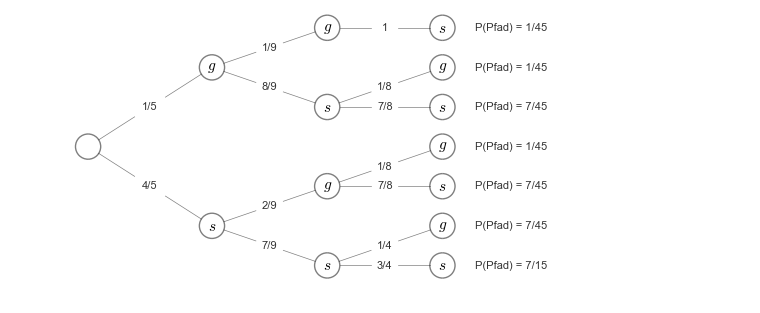

In [14]:
u.baum

In [15]:
A = { *symbols('sss, gss, sgs, ssg') }; A, u.P(A)

⎛                           14⎞
⎜set([gss, sgs, ssg, sss]), ──⎟
⎝                           15⎠

In [16]:
B = { *symbols('sgs, ggs, sgg') }; B, u.P(B)

(set([ggs, sgg, sgs]), 1/5)

In [17]:
C = { *symbols('ggs,gss,sgg,ssg,gsg') }; C, u.P(C)

⎛                                17⎞
⎜set([ggs, gsg, gss, sgg, ssg]), ──⎟
⎝                                45⎠

### zu b)

In [18]:
ea = EA(u.omega)

In [19]:
nichtC = ea.berechnen(C, C, 'nicht B')  # Beachtung der Benennung der Ereignisse 
nichtC                                  # bei der Anwendung der Methode

set([sgs, sss])

Die Ereignisse sind nicht unvereinbar

In [20]:
ea.berechnen(B, C, 'A und nicht B')   # ebenso

set([sgs])

### zu c)

In [21]:
u6 = Urne( { s:8, g:2 }, 6, w=ohne )
u6

Urne(Stufen=6, ohne Wiederholung , mit Anordnung)

In [22]:
u6.P('ssgsgs')

1/45

### Aufgabe 22
In einer Lostrommel befinden sich noch 50 Lose mit zwei Hauptgewinnen ($H$),<br>
acht Kleingewinnen ($K$) und 40 Nieten ($N$). Käthe kauft zwei Lose
<br>
<br>
a)  Zeichnen Sie ein Baumdiagramm und bestimmen Sie die Wahrscheinlichkeiten<br>
&nbsp;&nbsp;&nbsp;&nbsp;der Ereignisse
<br>
<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$A$ = "Genau ein Kleingewinn" und <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$B$ = "Mindestens ein Hauptgewinn" 
<br><br>
b)  Mit welcher Wahrscheinlichkeit zieht man beim 2. Los einen Hauptgewinn?
<br>
<br>
c)  Inge kauft fünf Lose und öffnet sie der Reihe nach. Mit welcher Wahrscheinlich- <br>
&nbsp;&nbsp;&nbsp;&nbsp;keit tritt das Elementarereignis $NKNNH$ ein?<br>

Das zugrunde liegende Urne-Modell ist

In [23]:
N = Symbol('N')   # das Symbol N war durch eine SymPy-Funktion belegt
H, K, N   # 3 Symbole

(H, K, N)

In [24]:
u = Urne( { H:2, K:8, N:40 }, 2, w=ohne )

### zu a)

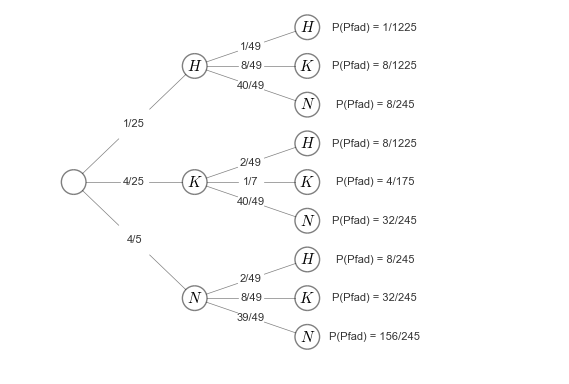

In [25]:
u.baum

In [26]:
A = { *symbols('KH, KN, HK, NK') }
B = { *symbols('HH, HK, HN, KH, NH') }
A, B

(set([HK, KH, KN, NK]), set([HH, HK, HN, KH, NH]))

In [27]:
u.P(A), u.P(A, d=4)

⎛ 48        ⎞
⎜───, 0.2743⎟
⎝175        ⎠

In [28]:
u.P(B), u.P(B, d=4)

⎛ 97         ⎞
⎜────, 0.0792⎟
⎝1225        ⎠

### zu b)

In [29]:
u.P( ['HH', 'KH', 'NH'] ), u.P( ['HH', 'KH', 'NH'], d=4 )

(1/25, 0.04)

### zu c)

In [30]:
u5 = Urne( { H:2, K:8, N:40 }, 5, w=ohne )
u5.P('NKNNH', d=4)

0.0037